# Practical Exam: Loan Insights
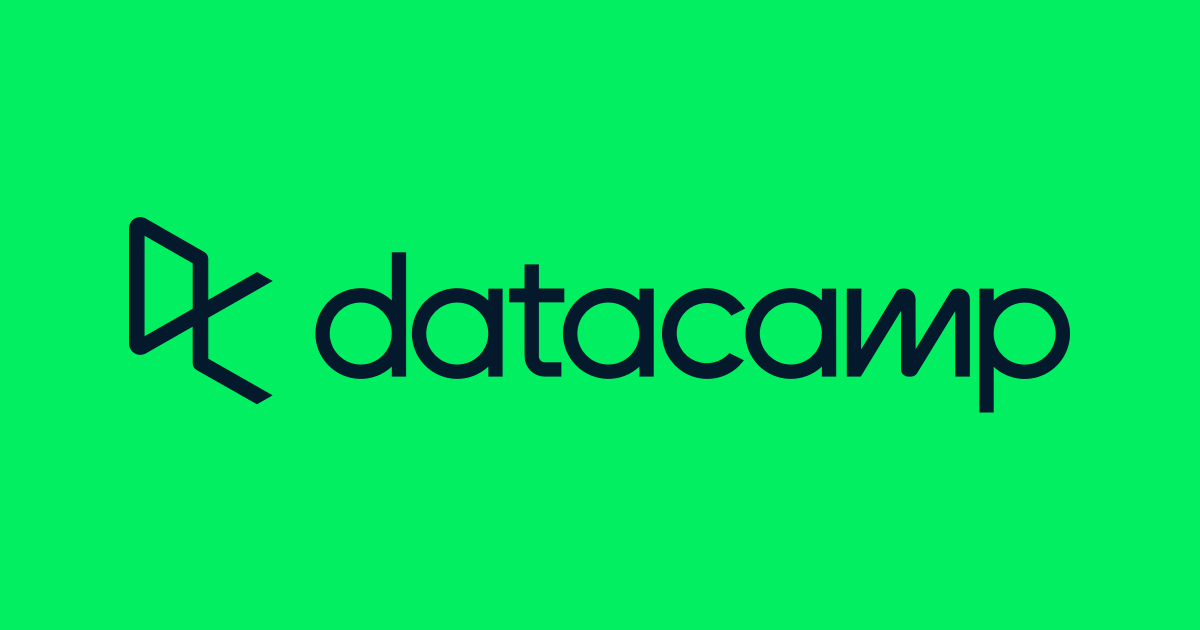

EasyLoan offers a wide range of loan services, including personal loans, car loans, and mortgages.

EasyLoan offers loans to clients from Canada, United Kingdom and United States.

The analytics team wants to report performance across different geographic areas. They aim to identify areas of strength and weakness for the business strategy team.

They need your help to ensure the data is accessible and reliable before they start reporting.


**Database Schema**

The data you need is in the database named `lending`.

1. ![database schema](lending_schema.png)

# Task 1 

The analytics team wants to use the `client` table to create a dashboard for client details. For them to proceed, they need to be sure the data is clean enough to use.

The `client` table below illustrates what the analytics team expects the data types and format to be.

Write a query that makes the `client` table match the description provided. Your query should not update the `client` table.

| Column Name       | Description                                                      |
|-------------------|------------------------------------------------------------------|
| client_id         | Unique integer (set by the database, can’t take any other value) |
| date\_of\_birth       | Date of birth of the client, as a date  (format: YYYY-MM-DD)                              |
| employment_status        | Current employment status of the client, either employed or unemployed, as a lower case string                              |
| country          | The country where the client resides, either USA, UK or CA, as an upper case string                      |

In [ ]:
SELECT client_id,
    TO_DATE(date_of_birth, 'Month DD, YYYY') AS date_of_birth,
    CASE
        WHEN employment_status = 'unemployed' THEN 'unemployed'
        ELSE 'employed'
    END AS employment_status,
    UPPER(country) as country
FROM client;

# Task 2

You have been told that there was a problem in the backend system as some of the `repayment_channel` values are missing. 

The missing values are critical to the analysis so they need to be filled in before proceeding.

Luckily, they have discovered a pattern in the missing values:

- Repayment higher than 4000 dollars should be made via `bank account`.
- Repayment lower than 1000 dollars should be made via `mail`.

Write a query that makes the `repayment` table match this criteria.

In [16]:
SELECT
  repayment_id,
  loan_id,
  repayment_date,
  repayment_amount,
  CASE
    WHEN repayment_channel = '-' AND repayment_amount > 4000 THEN 'bank account'
    WHEN repayment_channel = '-' AND repayment_amount < 1000 THEN 'mail'
    ELSE repayment_channel
  END AS repayment_channel
FROM repayment;

,repayment_id,loan_id,repayment_date,repayment_amount,repayment_channel
0,1,357,2022-10-16 00:00:00+00:00,1675.83,bank account
1,2,805,2023-01-12 00:00:00+00:00,867.22,debit card
2,3,843,2022-06-02 00:00:00+00:00,718.83,phone
3,4,243,2022-12-26 00:00:00+00:00,1620.97,credit card
4,5,991,2023-03-18 00:00:00+00:00,2182.17,phone
...,...,...,...,...,...
1495,1496,192,2023-02-11 00:00:00+00:00,2506.47,debit card
1496,1497,999,2022-11-21 00:00:00+00:00,1324.61,bank account
1497,1498,966,2023-01-26 00:00:00+00:00,1375.81,debit card
1498,1499,20,2023-03-30 00:00:00+00:00,1231.25,debit card


# Task 3

Starting on January 1st, 2022, all US clients started to use an online system to sign contracts.

The analytics team wants to analyze the loans for US clients who used the new online system.

Write a query that returns the data for the analytics team. Your output should include `client_id`,`contract_date`, `principal_amount` and `loan_type` columns.

![database schema](lending_schema.png)

In [17]:

SELECT
    client.client_id,
    contract.contract_date,
    loan.principal_amount,
    loan.loan_type
FROM
    client
JOIN
    loan ON client.client_id = loan.client_id
JOIN
    contract ON loan.contract_id = contract.contract_id
WHERE
    client.country = 'USA'
    AND contract.contract_date >= '2022-01-01';

,client_id,contract_date,principal_amount,loan_type
0,267,2022-03-08 00:00:00+00:00,179230,personal
1,50,2022-01-13 00:00:00+00:00,143729,mortgage
2,280,2022-01-02 00:00:00+00:00,171122,car
3,79,2022-01-24 00:00:00+00:00,43784,mortgage
4,245,2022-01-03 00:00:00+00:00,95003,mortgage
...,...,...,...,...
89,8,2022-01-13 00:00:00+00:00,148282,personal
90,232,2022-02-08 00:00:00+00:00,78386,personal
91,95,2022-03-20 00:00:00+00:00,39098,personal
92,123,2022-03-06 00:00:00+00:00,48213,car


# Task 4

The business strategy team is considering offering a more competitive rate to the US market. 

The analytic team want to compare the average interest rates offered by the company for the same loan type in different countries to determine if there are significant differences.

Write a query that returns the data for the analytics team. Your output should include `loan_type`, `country` and `avg_rate` columns.

![database schema](lending_schema.png)

In [18]:

SELECT
    l.loan_type,
    c.country,
    AVG(l.interest_rate) AS avg_rate
FROM
    loan AS l
JOIN
    client AS c ON l.client_id = c.client_id
GROUP BY
    l.loan_type, c.country
ORDER BY
    l.loan_type, country;

,loan_type,country,avg_rate
0,car,CA,0.112039
1,car,UK,0.122613
2,car,USA,0.103636
3,mortgage,CA,0.044068
4,mortgage,UK,0.042281
5,mortgage,USA,0.043860
6,personal,CA,0.217253
7,personal,UK,0.198738
8,personal,USA,0.202721


In [ ]:
# Done By Osama Alhroub